# Describe Cell Count in the Cell Painting Experiment

In [1]:
import pathlib
import pandas as pd

In [2]:
cell_count_dir = pathlib.Path("results")

cell_count_df = []
for file in cell_count_dir.iterdir():
    if "cell_count" in str(file):
        plate = file.name.split("_")[0]
        df = pd.read_csv(file, sep="\t").rename({plate: "cell_count"}, axis="columns")
        cell_count_df.append(df)
        
cell_count_df = pd.concat(cell_count_df)

print(cell_count_df.shape)
cell_count_df.head()

(3456, 6)


,Image_Metadata_Well,cell_count,gene_name,pert_name,broad_sample,cell_line
0,A01,4335,EMPTY,EMPTY,NaN,A549
1,A02,4129,MCL1,MCL1-5,NaN,A549
2,A03,4895,AKT1,AKT1-1,BRDN0001054908,A549
3,A04,4261,KRAS,KRAS-2B,NaN,A549
4,A05,4474,AKT1,AKT1-2,BRDN0001055115,A549


In [3]:
# Total number of cells
cell_count_df.cell_count.sum()

8964210

In [4]:
# Count cells by perturbation
cell_count_df.groupby("pert_name")["cell_count"].sum().sort_values(ascending=False)

pert_name
EMPTY        1463714
Chr2-4        211271
PPIB-1        209781
ORC4-1        200664
Chr2-5        199379
ORC4-2        197358
Chr2-2        194806
Chr2-6        192870
Chr2-1        185315
Chr2-3        183403
PPIB-2        176050
Luc-1         142910
PSMA1-1       140953
POLR2D-2      109563
PSMA1-2       108587
LacZ-2        105392
LacZ-3        104454
POLR2D-1       92795
Luc-2          81260
EGFR-1         57288
RAC1-1         56834
BCL2L2-2       56170
KRAS-2B        55988
CTNNB1-2       55812
DOT1L-2        55738
PRDX1-1        55607
HIF1a-2        55189
AKT1-2         54979
SMARCB1-2      54574
PIK3CA-2       53948
              ...   
KRAS-2A        45431
SLC2A1-1       45242
JAK3-1         44971
SUZ12-1        44777
KRAS-1         44356
BRD4-2         43380
COX5B-2        43201
GPX4-2         43167
CCND1-1        41903
EGLN1-9        41728
GLS-2          41450
CDK2-1         41313
CCNE1-1        41002
ATP50-2        40910
SUZ12-2        40431
ATF4-2         40300
CCN

In [5]:
# Cell count by cell line
cell_line_groupby = cell_count_df.groupby("cell_line")
cell_line_groupby["cell_count"].sum()

cell_line
A549     4318583
ES2      2182869
HCC44    2462758
Name: cell_count, dtype: int64

cell_line
A549     AxesSubplot(0.125,0.125;0.775x0.755)
ES2      AxesSubplot(0.125,0.125;0.775x0.755)
HCC44    AxesSubplot(0.125,0.125;0.775x0.755)
Name: cell_count, dtype: object

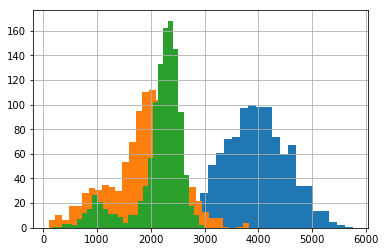

In [6]:
cell_line_groupby["cell_count"].hist(bins=30)

In [7]:
# Also, how many features?
profile_dir = pathlib.Path("data", "profiles")
for file in profile_dir.iterdir():
    plate = file.name
    plate_dir = pathlib.Path(profile_dir, plate)
    if plate != '.DS_Store':
        profile_file = plate_dir / f"{plate}.csv.gz"
        profile_df = pd.read_csv(profile_file)
        print(f"{plate}:")
        print(profile_df.shape)

SQ00014618:
(384, 1785)
SQ00014611:
(384, 1785)
SQ00014616:
(384, 1785)
SQ00014617:
(384, 1785)
SQ00014610:
(384, 1785)
SQ00014615:
(384, 1785)
SQ00014612:
(384, 1785)
SQ00014613:
(384, 1785)
SQ00014614:
(384, 1785)
